In [1]:
import pandas as pd


In [2]:
# Load the dataset
data = pd.read_csv('/content/Housing.csv')


In [3]:
data.head()

,Stories,Area,Bedrooms,Bathrooms,Mainroad,Guestroom,Hot-water,AC,Basement,Furnishing,Parking,Prefarea,PriceUS$
0,3,7420,4,2,yes,no,no,yes,no,furnished,2,yes,13300000
1,4,8960,4,4,yes,no,no,yes,no,furnished,3,no,12250000
2,2,9960,3,2,yes,no,no,no,yes,semi-furnished,2,yes,12250000
3,2,7500,4,2,yes,no,no,yes,yes,furnished,3,yes,12215000
4,2,7420,4,1,yes,yes,no,yes,yes,furnished,2,no,11410000


In [4]:
# Display the number of missing values per column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Stories       0
Area          0
Bedrooms      0
Bathrooms     0
Mainroad      0
Guestroom     0
Hot-water     0
AC            0
Basement      0
Furnishing    0
Parking       0
Prefarea      0
PriceUS$      0
dtype: int64


In [5]:
# To see the percentage of missing values per column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)



Percentage of missing values per column:
 Stories       0.0
Area          0.0
Bedrooms      0.0
Bathrooms     0.0
Mainroad      0.0
Guestroom     0.0
Hot-water     0.0
AC            0.0
Basement      0.0
Furnishing    0.0
Parking       0.0
Prefarea      0.0
PriceUS$      0.0
dtype: float64


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
# Convert all yes/no columns using Label Encoding
binary_cols = ['Mainroad', 'Guestroom', 'Hot-water', 'AC', 'Basement', 'Prefarea']
le = LabelEncoder()

for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [8]:
# One-Hot Encode 'Furnishing' column (multiple categories)
data = pd.get_dummies(data, columns=['Furnishing'], drop_first=True)

print(data)

     Stories  Area  Bedrooms  Bathrooms  Mainroad  Guestroom  Hot-water  AC  \
0          3  7420         4          2         1          0          0   1   
1          4  8960         4          4         1          0          0   1   
2          2  9960         3          2         1          0          0   0   
3          2  7500         4          2         1          0          0   1   
4          2  7420         4          1         1          1          0   1   
..       ...   ...       ...        ...       ...        ...        ...  ..   
540        1  3000         2          1         1          0          0   0   
541        1  2400         3          1         0          0          0   0   
542        1  3620         2          1         1          0          0   0   
543        1  2910         3          1         0          0          0   0   
544        2  3850         3          1         1          0          0   0   

     Basement  Parking  Prefarea  PriceUS$  Furnish

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 1. Summary statistics
print(data.describe())

          Stories          Area    Bedrooms   Bathrooms    Mainroad  \
count  545.000000    545.000000  545.000000  545.000000  545.000000   
mean     1.805505   5150.541284    2.965138    1.286239    0.858716   
std      0.867492   2170.141023    0.738064    0.502470    0.348635   
min      1.000000   1650.000000    1.000000    1.000000    0.000000   
25%      1.000000   3600.000000    2.000000    1.000000    1.000000   
50%      2.000000   4600.000000    3.000000    1.000000    1.000000   
75%      2.000000   6360.000000    3.000000    2.000000    1.000000   
max      4.000000  16200.000000    6.000000    4.000000    1.000000   

        Guestroom   Hot-water          AC    Basement     Parking    Prefarea  \
count  545.000000  545.000000  545.000000  545.000000  545.000000  545.000000   
mean     0.177982    0.045872    0.315596    0.350459    0.693578    0.234862   
std      0.382849    0.209399    0.465180    0.477552    0.861586    0.424302   
min      0.000000    0.000000    0.0

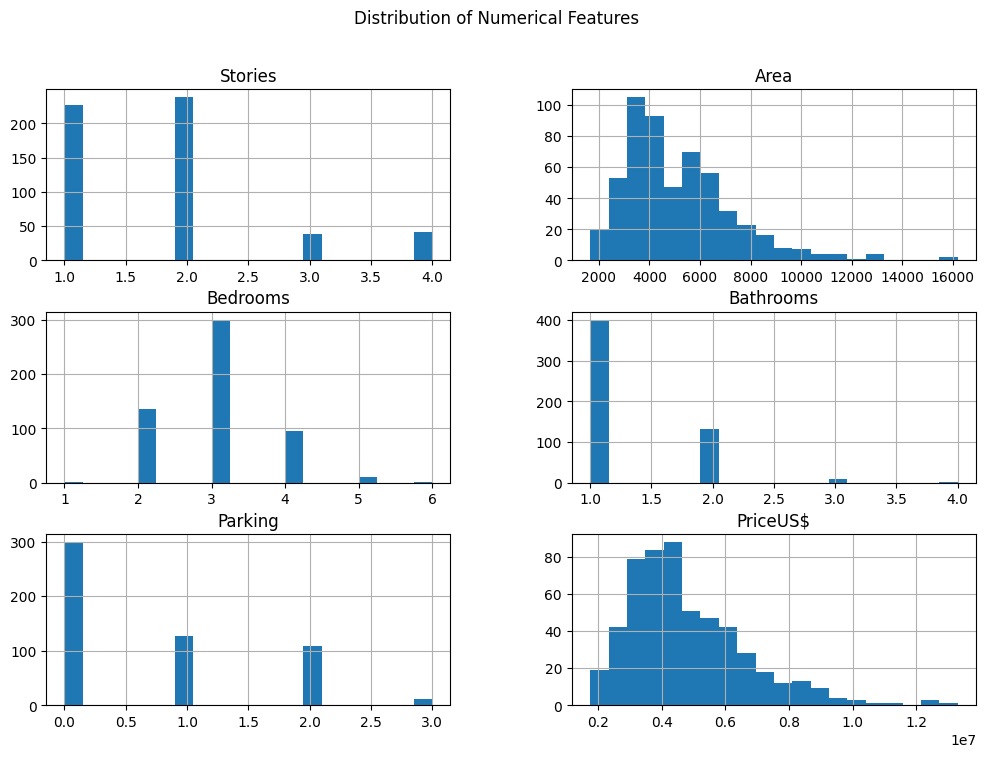

In [11]:
# 2. Distribution of numerical features
num_cols = ['Stories', 'Area', 'Bedrooms', 'Bathrooms', 'Parking', 'PriceUS$']
data[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

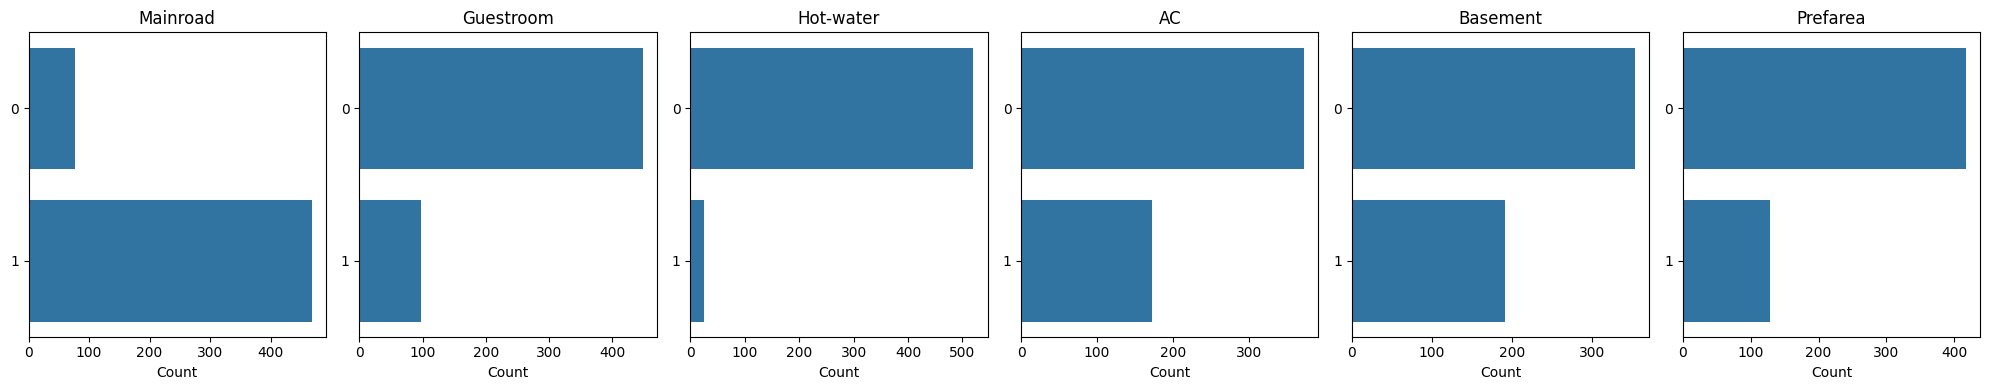

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Mainroad', 'Guestroom', 'Hot-water', 'AC', 'Basement', 'Prefarea']

plt.figure(figsize=(20, 4))  # Wide figure for horizontal layout

for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i+1)  # 1 row, N cols
    sns.countplot(y=col, data=data)
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('')

plt.tight_layout()
plt.show()


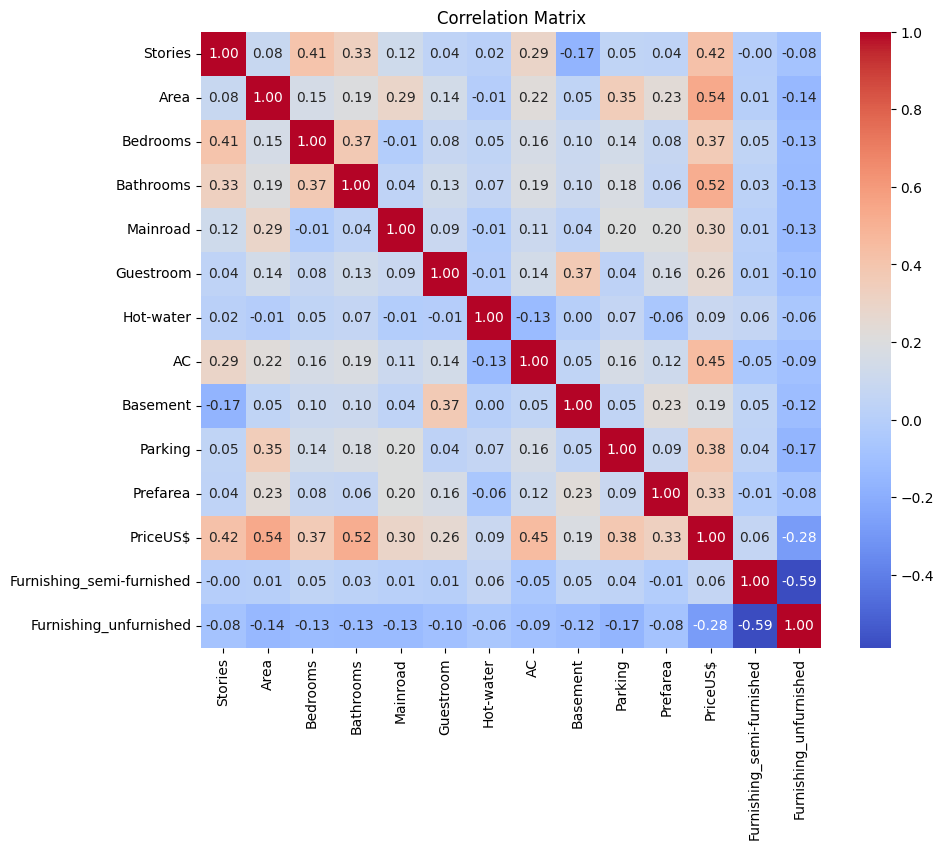

In [13]:
# Correlation matrix to check relationships
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Compute correlation matrix
corr = data.corr()

# Round values for neatness
corr_rounded = corr.round(2)

# Display as a table
print("Correlation Table:")
display(corr_rounded)


Correlation Table:


,Stories,Area,Bedrooms,Bathrooms,Mainroad,Guestroom,Hot-water,AC,Basement,Parking,Prefarea,PriceUS$,Furnishing_semi-furnished,Furnishing_unfurnished
Stories,1.00,0.08,0.41,0.33,0.12,0.04,0.02,0.29,-0.17,0.05,0.04,0.42,-0.00,-0.08
Area,0.08,1.00,0.15,0.19,0.29,0.14,-0.01,0.22,0.05,0.35,0.23,0.54,0.01,-0.14
Bedrooms,0.41,0.15,1.00,0.37,-0.01,0.08,0.05,0.16,0.10,0.14,0.08,0.37,0.05,-0.13
Bathrooms,0.33,0.19,0.37,1.00,0.04,0.13,0.07,0.19,0.10,0.18,0.06,0.52,0.03,-0.13
Mainroad,0.12,0.29,-0.01,0.04,1.00,0.09,-0.01,0.11,0.04,0.20,0.20,0.30,0.01,-0.13
Guestroom,0.04,0.14,0.08,0.13,0.09,1.00,-0.01,0.14,0.37,0.04,0.16,0.26,0.01,-0.10
Hot-water,0.02,-0.01,0.05,0.07,-0.01,-0.01,1.00,-0.13,0.00,0.07,-0.06,0.09,0.06,-0.06
AC,0.29,0.22,0.16,0.19,0.11,0.14,-0.13,1.00,0.05,0.16,0.12,0.45,-0.05,-0.09
Basement,-0.17,0.05,0.10,0.10,0.04,0.37,0.00,0.05,1.00,0.05,0.23,0.19,0.05,-0.12
Parking,0.05,0.35,0.14,0.18,0.20,0.04,0.07,0.16,0.05,1.00,0.09,0.38,0.04,-0.17


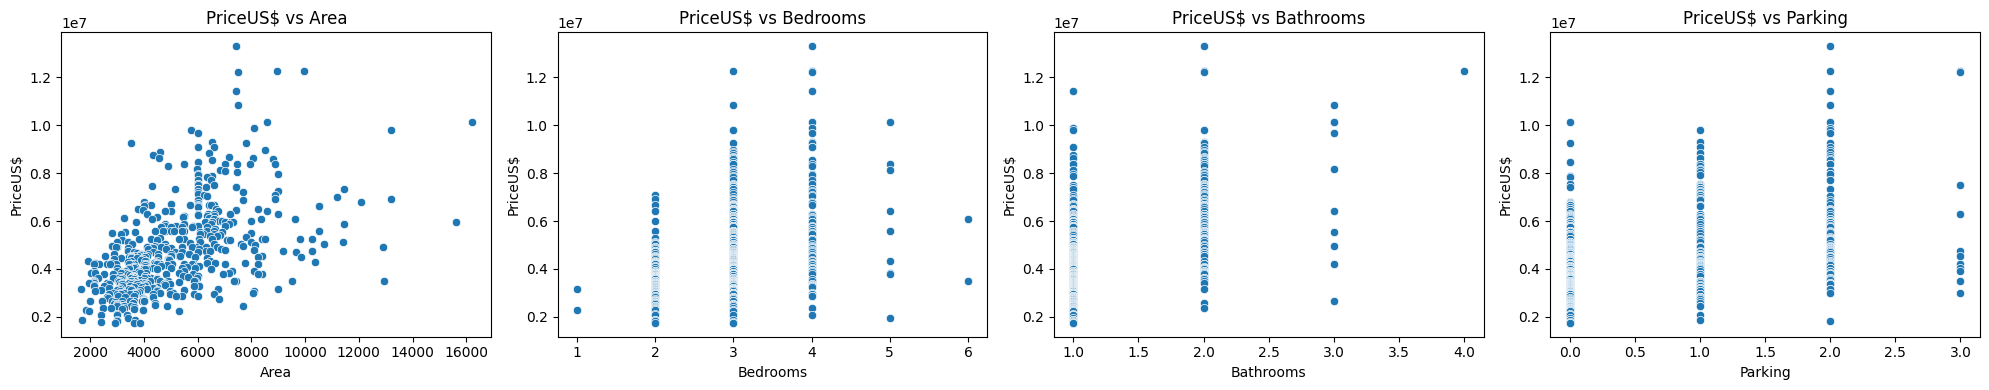

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Area', 'Bedrooms', 'Bathrooms', 'Parking']
fig, axes = plt.subplots(1, len(features), figsize=(20, 4))  # 1 row, 4 columns

for i, col in enumerate(features):
    sns.scatterplot(x=col, y='PriceUS$', data=data, ax=axes[i])
    axes[i].set_title(f'PriceUS$ vs {col}')

plt.tight_layout()
plt.show()


In [16]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [17]:
# Define features and target
X = data.drop('PriceUS$', axis=1)
y = data['PriceUS$']

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Define and train classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

In [22]:
# Evaluate models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00       1.0
     1820000       0.00      0.00      0.00       1.0
     1890000       0.00      0.00      0.00       2.0
     2100000       0.00      0.00      0.00       1.0
     2233000       0.00      0.00      0.00       1.0
     2275000       0.00      0.00      0.00       1.0
     2380000       0.00      0.00      0.00       1.0
     2450000       0.00      0.00      0.00       2.0
     2520000       0.00      0.00      0.00       1.0
     2653000       0.00      0.00      0.00       0.0
     2660000       0.00      0.00      0.00       4.0
     2800000       0.00      0.00      0.00       1.0
     2870000       0.00      0.00      0.00       1.0
     2940000       0.00      0.00      0.00       2.0
     3003000       0.00      0.00      0.00       1.0
     3010000       0.00      0.00      0.00       1.0
     3045000       0.00      0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Classification Report:
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00       1.0
     1820000       0.00      0.00      0.00       1.0
     1855000       0.00      0.00      0.00       0.0
     1890000       0.00      0.00      0.00       2.0
     2100000       0.00      0.00      0.00       1.0
     2233000       0.00      0.00      0.00       1.0
     2275000       0.00      0.00      0.00       1.0
     2345000       0.00      0.00      0.00       0.0
     2380000       0.00      0.00      0.00       1.0
     2450000       0.00      0.00      0.00       2.0
     2520000       0.00      0.00      0.00       1.0
     2653000       0.00      0.00      0.00       0.0
     2660000       0.00      0.00      0.00       4.0
     2800000       0.00      0.00      0.00       1.0
     2870000       0.00      0.00      0.00       1.0
     2940000       0.00      0.00      0.00       2.0
     2961000       0.00      0.00      0.00       0.0
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [26]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load dataset
data = pd.read_csv('/content/Housing.csv')

In [28]:
# Create price categories (Low, Medium, High)
bins = [0, 4000000, 7000000, data['PriceUS$'].max()]
labels = ['Low', 'Medium', 'High']
data['PriceCategory'] = pd.cut(data['PriceUS$'], bins=bins, labels=labels)

In [29]:
# Prepare features and target
X = data[['Area', 'Bedrooms', 'Bathrooms', 'Parking']]  # choose more if relevant
y = data['PriceCategory']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Define a function to train and evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 {model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


📊 Logistic Regression Metrics:
Accuracy: 0.6880733944954128
Precision: 0.6948223136138354
Recall: 0.6880733944954128
F1 Score: 0.6851125938281902
Confusion Matrix:
 [[ 7  0  8]
 [ 0 30 12]
 [ 2 12 38]]


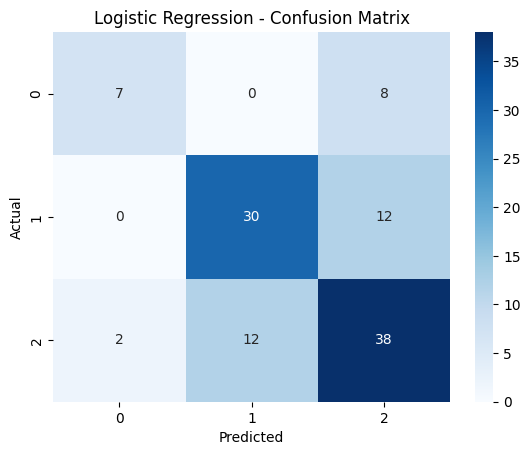


📊 Decision Tree Classifier Metrics:
Accuracy: 0.6146788990825688
Precision: 0.6253633273686103
Recall: 0.6146788990825688
F1 Score: 0.6160412930621003
Confusion Matrix:
 [[ 9  0  6]
 [ 1 24 17]
 [ 8 10 34]]


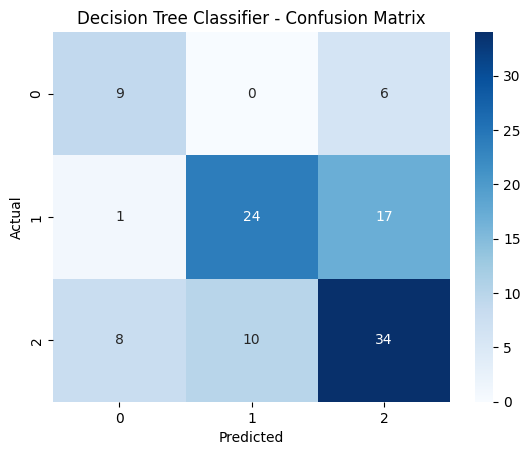


📊 Random Forest Classifier Metrics:
Accuracy: 0.6330275229357798
Precision: 0.6470441053819359
Recall: 0.6330275229357798
F1 Score: 0.6353186834014642
Confusion Matrix:
 [[10  0  5]
 [ 1 25 16]
 [ 9  9 34]]


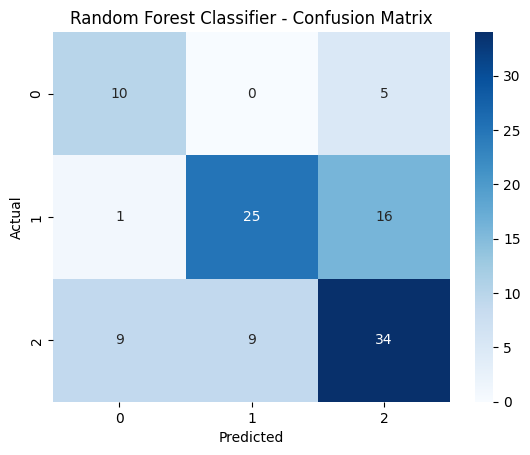


📊 KNN Classifier Metrics:
Accuracy: 0.6422018348623854
Precision: 0.6466284171626859
Recall: 0.6422018348623854
F1 Score: 0.6428192531395943
Confusion Matrix:
 [[10  0  5]
 [ 0 26 16]
 [ 7 11 34]]


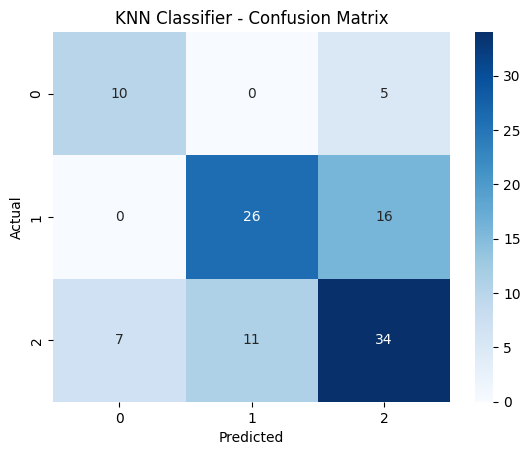

In [33]:
# Train and evaluate each model
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")
evaluate_model(DecisionTreeClassifier(), "Decision Tree Classifier")
evaluate_model(RandomForestClassifier(), "Random Forest Classifier")
evaluate_model(KNeighborsClassifier(), "KNN Classifier")